# Visualizing Ford GoBike System Data (January 2019)
### by Mashael AlSaadan

## Table of Contents
<ul> 
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangle">Preliminary Wrangling</a></li>
    <li><a href="#univar">Univariate Exploration</a></li>
    <li><a href="#bivar">Bivariate Exploration</a></li>
    <li><a href="#multivar">Multivariate Exploration</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
    <li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction
Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019

Ford GoBike consists of three kinds of bicycles: standard docked bicycles with a step-through frame, a docked electric-assist bicycle, and a dockless variant of the standard bicycle equipped with a rear-wheel lock. The bicycles are available 24 hours a day, seven days a week for periods ranging from a single ride (up to 30 minutes) to a day pass.

<a id='wrangle'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
ford_df = pd.read_csv('201901-fordgobike-tripdata.csv', sep=';')

In [3]:
# high-level overview of data shape and composition
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192082 entries, 0 to 192081
Data columns (total 14 columns):
duration_sec               192082 non-null int64
start_time                 192082 non-null object
end_time                   192082 non-null object
start_station_id           191834 non-null float64
start_station_name         191834 non-null object
start_station_latitude     192082 non-null float64
start_station_longitude    192082 non-null float64
end_station_id             191834 non-null float64
end_station_name           191834 non-null object
end_station_latitude       192082 non-null float64
end_station_longitude      192082 non-null float64
bike_id                    192082 non-null int64
user_type                  192082 non-null object
bike_share_for_all_trip    192082 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 20.5+ MB


In [4]:
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No


In [5]:
ford_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,192082.000000,191834.000000,192082.000000,192082.000000,191834.000000,192082.000000,192082.000000,192082.000000
mean,750.952473,132.841639,37.773438,-122.357820,131.218700,37.773570,-122.357419,4029.012609
std,1672.433843,109.662417,0.091433,0.109472,109.546275,0.091332,0.109058,1571.288901
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,333.000000,43.000000,37.770407,-122.412408,41.000000,37.771058,-122.411726,3088.000000
50%,528.000000,98.000000,37.780955,-122.398438,95.000000,37.781010,-122.398436,4748.000000
75%,821.000000,211.000000,37.795913,-122.294837,203.000000,37.796248,-122.294837,5173.000000
max,84002.000000,385.000000,37.880222,-121.874119,385.000000,37.880222,-121.874119,6638.000000


In [6]:
# check for duplication
ford_df.duplicated().sum()

0

In [7]:
# check for nulls
ford_df.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           248
start_station_name         248
start_station_latitude       0
start_station_longitude      0
end_station_id             248
end_station_name           248
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
bike_share_for_all_trip      0
dtype: int64

### Cleaning

In [8]:
# make copy to clean the data
ford_clean = ford_df.copy()

##### Define: Convert the datatypes of the following attributes:
1. start_time and end_time to datetime datatype
2. start_station_id, start_station_name, end_station_id, end_station_name and bike_id to object datatype
3. user_type and bike_share_for_all_trip to category datatype

##### Code

In [9]:
# 1. start,end time => datetime
ford_clean['start_time'] = pd.to_datetime(ford_clean['start_time'], format='%Y-%m-%d %H:%M:%S.%f')
ford_clean['end_time'] = pd.to_datetime(ford_clean['end_time'], format='%Y-%m-%d %H:%M:%S.%f')

In [10]:
# 2. station id,name, bike id => object
ford_clean['start_station_id'] = ford_clean['start_station_id'].astype(str)
ford_clean['start_station_name'] = ford_clean['start_station_name'].astype(str)
ford_clean['end_station_id'] = ford_clean['end_station_id'].astype(str)
ford_clean['end_station_name'] = ford_clean['end_station_name'].astype(str)
ford_clean['bike_id'] = ford_clean['bike_id'].astype(str)

In [11]:
# 3. user type & bike share => category
ford_clean['user_type'] = ford_clean['user_type'].astype('category')
ford_clean['bike_share_for_all_trip'] = ford_clean['bike_share_for_all_trip'].astype('category')

In [12]:
ford_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
bike_share_for_all_trip          category
dtype: object

##### Test

In [13]:
ford_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
bike_share_for_all_trip          category
dtype: object

##### Define: Drop rows with null ids

##### Code

In [14]:
# remove stations that don't have station id
ford_clean = ford_clean[ford_clean['start_station_id'].isnull() == False]

##### Test

In [15]:
ford_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

##### Define: Derive the following columns from existing attributes:
1. Day of week from start time 
2. Time from start time
3. Convert duration to minutes
4. Calculate distance from latitude and longitude

##### Code

In [16]:
# 1. Day of week from start time
ford_clean['start_day'] = ford_clean['start_time'].dt.strftime('%A')

In [17]:
# 1.1 convert day of the week to categorical datatype
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_of_week = pd.api.types.CategoricalDtype(ordered = True, categories = days)
ford_clean['start_day'] = ford_clean['start_day'].astype(days_of_week)

In [18]:
# 2. Time from start time
ford_clean['start_hour'] = ford_clean['start_time'].dt.strftime('%I %p')
hours = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', '08 AM', '09 AM', '10 AM', '11 AM',
        '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM']
hours_start = pd.api.types.CategoricalDtype(ordered = True, categories = hours)
ford_clean['start_hour'] = ford_clean['start_hour'].astype(hours_start)

In [19]:
# 3. Convert duration column to minutes
ford_clean['duration_min'] = (ford_clean['duration_sec']/60).astype(int)

In [20]:
# 4. Calculate distance
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d * 0.621371

In [21]:
ford_clean['distance_miles'] = ford_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

##### Test

In [22]:
ford_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_day,start_hour,duration_min,distance_miles
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,Thursday,05 PM,1347,3.296497
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,Thursday,08 PM,1098,2.398261
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,Thursday,06 PM,1043,2.042508
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,Thursday,07 PM,744,0.621142
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,Thursday,02 PM,1011,0.592387


In [55]:
# saving the clean dataset
ford_clean.to_csv('ford_clean.csv', index=False)

### What is the structure of your dataset?

The dataset contains 192082 bike trips that happended in January 2019. There are 18 Features that describe each trip in the following:
<br><br>14 Features were provided in the dataset:<br><ul>
    <li>Trip Duration (seconds): Total trip's duration in the unit of time seconds</li>
    <li>Start Time: Trip's starting time and date</li>
    <li>End Time: Trip's ending time and date</li>
    <li>Start Station ID: The id of the trip's starting station</li>
    <li>Start Station Name: The name of the trip's starting station</li>
    <li>Start Station Latitude: The latitude of the trip's starting station</li>
    <li>Start Station Longitude: The longitude of the trip's starting station</li>
    <li>End Station ID: The id of the trip's ending station</li>
    <li>End Station Name: The name of the trip's ending station</li>
    <li>End Station Latitude: The latitude of the trip's ending station</li>
    <li>End Station Longitude: The longitude of the trip's ending station</li>
    <li>Bike ID: The id of the rented bike</li>
    <li>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)</li>
    <li>Bike share for all membership: This membership is eligible for only Bay Area residents ages 18 and older</li></ul><br>4 Features were derived from the above in the cleaning process: <ul>
    <li>Start Day (Day of the week): The trip's starting day</li>
    <li>Start hour in 12-hours: The trip's starting hour in 12-hours format</li>
    <li>Duration in hours: Total trip's duration in the unit of time minutes</li>
    <li>Distance in miles: Trip's distance in the unit of miles.</li></ul>

### What is/are the main feature(s) of interest in your dataset?

Mainly I'm interested in the features that are related to the trip time and date. I can use those features to calculate the high and low demands of the bikes to make them availabale in those days/times.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

All time-based related features and user-related features.

<a id='univar'></a>
## Univariate Exploration
In this section, I will investigate each variable as individual variable, which will help later when looking at relationships between variables.

In [24]:
# Setting base color
base_color = sb.color_palette()[0]

In [25]:
ford_clean.groupby(pd.Grouper(key='start_day'))['bike_id'].count()

start_day
Monday       28642
Tuesday      31338
Wednesday    35830
Thursday     38448
Friday       28745
Saturday     17022
Sunday       12057
Name: bike_id, dtype: int64

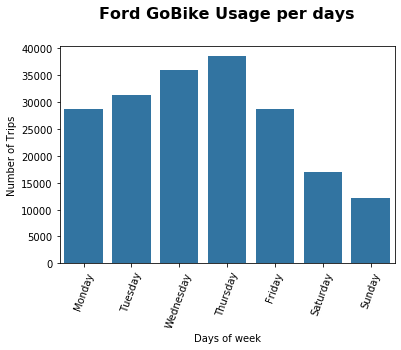

In [26]:
# Usage by days
sb.countplot(data = ford_clean, x = 'start_day', color = base_color);
plt.xticks(rotation = 70);
plt.title('Ford GoBike Usage per days', y=1.1, fontsize=16, fontweight='bold');
plt.xlabel('Days of week')
plt.ylabel('Number of Trips');

###### Observation #1: The bikes mainly used during weekdays, with the busiest day Thursday and the most quiet day is Sunday.

In [27]:
ford_clean.groupby(pd.Grouper(key='start_hour'))['bike_id'].count()

start_hour
12 AM     1048
01 AM      689
02 AM      404
03 AM      233
04 AM      338
05 AM     1136
06 AM     3970
07 AM    10476
08 AM    21683
09 AM    16828
10 AM     8111
11 AM     7615
12 PM     8965
01 PM     8802
02 PM     8587
03 PM    10119
04 PM    15329
05 PM    23343
06 PM    17128
07 PM    10298
08 PM     6711
09 PM     5093
10 PM     3256
11 PM     1920
Name: bike_id, dtype: int64

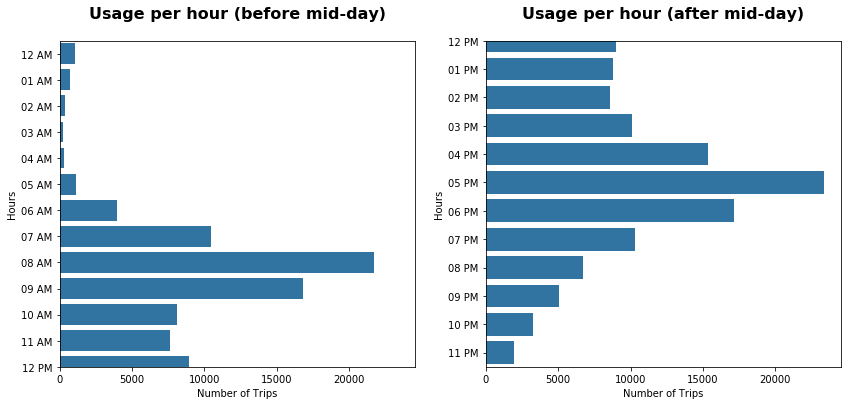

In [28]:
# Usage by hour
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
sb.countplot(data = ford_clean, y = 'start_hour', color=base_color); 
plt.ylim(12);
plt.title('Usage per hour (before mid-day)', y=1.05, fontsize=16, fontweight='bold');
plt.ylabel('Hours')
plt.xlabel('Number of Trips');

plt.subplot(1,2,2)
sb.countplot(data = ford_clean, y = 'start_hour', color=base_color); 
plt.ylim(top=12);
plt.title('Usage per hour (after mid-day)', y=1.05, fontsize=16, fontweight='bold');
plt.ylabel('Hours')
plt.xlabel('Number of Trips');

###### Observation #2: Most bike trips happens in 8 AM and 5 PM (the peaks), which are regular work hours in the US. This suggests that most of the bikes are used as daily school or work commute.

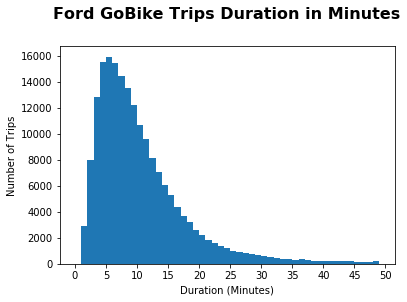

In [29]:
# limiting minutes to 50 minute = an hour
bins = np.arange(0, 50, 1)
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data=ford_clean, x='duration_min', bins=bins);
plt.xticks(ticks,labels);
plt.title('Ford GoBike Trips Duration in Minutes', y=1.1, fontsize=16, fontweight='bold');
plt.xlabel('Duration (Minutes)');
plt.ylabel('Number of Trips');

In [30]:
ford_clean.duration_min.describe()

count    192082.000000
mean         12.024141
std          27.874780
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1400.000000
Name: duration_min, dtype: float64

###### Observation #3: By just looking at the above histogram, we can see that most trips last 5-15 minutes. After further invistigation, I found that the average trips' duration is 12 minutes, with 75% of the trips' duration being under 13 minutes. This could suggest that the trips' distance is short.

In [31]:
ford_clean.distance_miles.describe()

count    192082.000000
mean          1.054487
std           0.685749
min           0.000000
25%           0.566878
50%           0.895654
75%           1.388019
max          38.064762
Name: distance_miles, dtype: float64

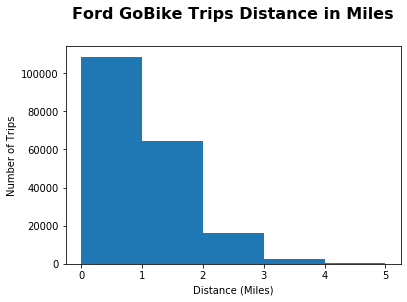

In [32]:
bins = np.arange(0, 6, 1)
plt.hist(data=ford_clean, x='distance_miles', bins=bins, color=base_color);
plt.title('Ford GoBike Trips Distance in Miles', y=1.1, fontsize=16, fontweight='bold');
plt.xlabel('Distance (Miles)');
plt.ylabel('Number of Trips');

###### Observation #4: The above histogram shows that most trips' distance falls under 1 mile.

In [33]:
users = ford_clean.user_type.value_counts()
users

Subscriber    168732
Customer       23350
Name: user_type, dtype: int64

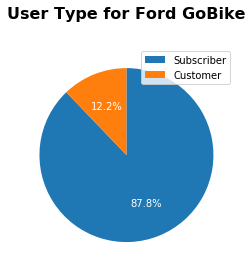

In [34]:
plt.pie(users, labels=users.index, startangle=90, autopct='%1.1f%%', counterclock = False, textprops={'color':'white'});
plt.legend();
plt.title('User Type for Ford GoBike', y=1.1, fontsize=16, fontweight='bold');

###### Observation #5: The pie chart demonstrates the overwhelming majority bikers represented as 87.8% of total bikers, are subscribers.

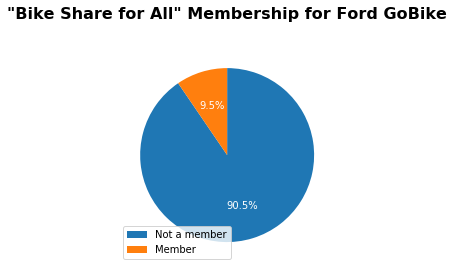

In [60]:
labels = ['Not a member','Member']
df = ford_clean[ford_clean['user_type'] == 'Subscriber']
share = df.bike_share_for_all_trip.value_counts()
plt.pie(share, labels=labels, startangle=90, autopct='%1.1f%%', counterclock = False, textprops={'color':'white'});
plt.legend();
plt.title('"Bike Share for All" Membership for Ford GoBike', y=1.1, fontsize=16, fontweight='bold');

###### Observation #6: The pie chart above shows that 9.5% of total subscribers are for sure at the age of 18 or older and residents in the Bay arena, while the majority 90.5% are either not eligible for the membership (younger than 18 years old or not residents) or they prefer another type of membership (which is unlikely since this one saves alot of many and provides lots of features).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Every thing was as expected, except some cases where the duration of the trip lasts for 23 hours, so I sat the maximum range to 50 minutes = 1 hour.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Nothing seems out of what I expected.

<a id='bivar'></a>
## Bivariate Exploration

In this section, I will investigate relationships between pairs of variables in the
dataset.

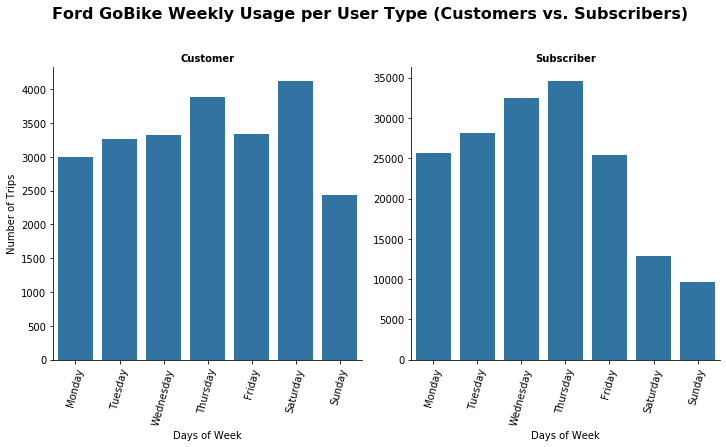

In [37]:
# Weekly usage per user type
fig = sb.catplot(data=ford_clean, x='start_day', col = 'user_type', kind='count', color=base_color, sharey=False);
fig.set_axis_labels("Days of Week", "Number of Trips");
fig.set_titles('{col_name}', y=1.1, fontweight='bold');
fig.fig.suptitle('Ford GoBike Weekly Usage per User Type (Customers vs. Subscribers)', y=1.1, fontsize=16, fontweight='bold');
fig.set_xticklabels(rotation = 75);

###### Observation #1: It is very clear that the higher usage goes for the subscriber type. Subscribers are probably daily school/work commuters so it is expected that they have high demands on the weekdays. Customers are the opposite, they are occational riders and tourists, so their usage is low with a small increase on the weekends.

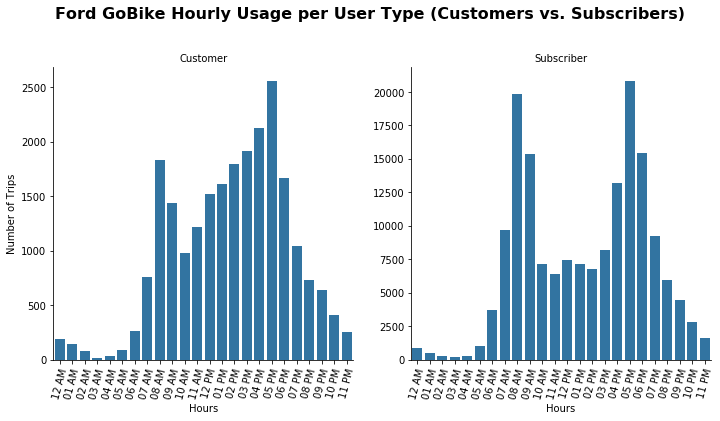

In [38]:
# Hourly usage per user type
fig = sb.catplot(data=ford_clean, x='start_hour', col = 'user_type', kind='count', color=base_color, sharey=False);
fig.set_axis_labels("Hours", "Number of Trips");
fig.set_titles('{col_name}');
fig.fig.suptitle('Ford GoBike Hourly Usage per User Type (Customers vs. Subscribers)', y=1.1, fontsize=16, fontweight='bold');
fig.set_xticklabels(rotation = 75);

###### Observation #2: It is clear that there is a trend on bikes' hourly usage per user type. Customers rent bikes between 8 am - 6 pm, reaching the peak on 5 pm. On the other hand, subscribers use bikes as daily school/work commute, so their usage lays around 8-9am and 5-6pm.

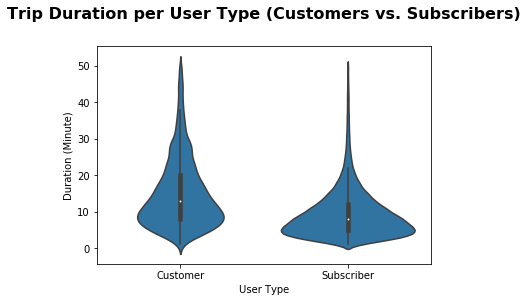

In [39]:
# Trips duration per user type - Violin plot
user_dur = ford_clean.query('duration_min <= 50')
sb.violinplot(data = user_dur, x='user_type', y='duration_min', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Duration (Minute)');
plt.title('Trip Duration per User Type (Customers vs. Subscribers)', y=1.1, fontsize=16, fontweight='bold');

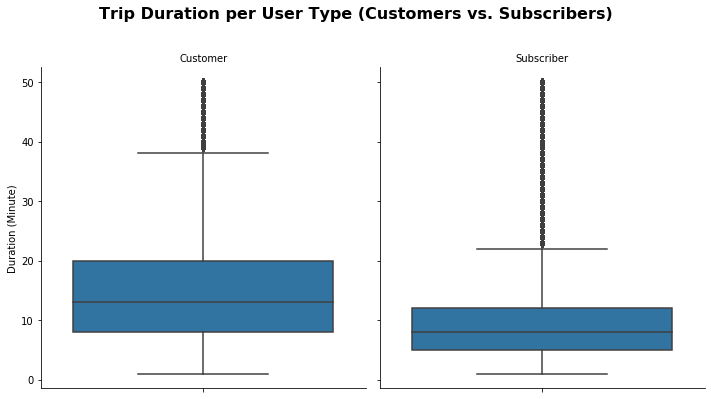

In [40]:
# Trips duration per user type - box plot
fig = sb.catplot(data=user_dur, y='duration_min', col="user_type", kind='box', color = base_color);
fig.set_titles(col_template = '{col_name}')
fig.set_axis_labels("", "Duration (Minute)")
fig.fig.suptitle('Trip Duration per User Type (Customers vs. Subscribers)', y=1.1, fontsize=16, fontweight='bold');

###### Observation #3: The above shows the trip duration's spread in the unit of minutes. We can see that customers trips' duration last longer than subscriber as we have mentioned that the majority of subscribers are workers/students and need to commute quickly. Customer trips' duration lasts 10-12 minutes, where subscribers' duration is 8-14 minutes.

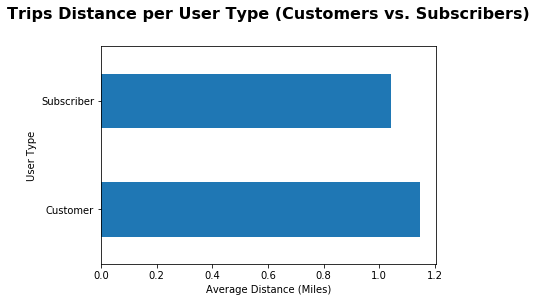

In [41]:
# Trips distance per user type
ford_clean.groupby('user_type')['distance_miles'].mean().plot(kind='barh');
plt.xlabel('Average Distance (Miles)');
plt.ylabel('User Type');
plt.title('Trips Distance per User Type (Customers vs. Subscribers)', y=1.1, fontsize=16, fontweight='bold');

###### Observation #4: The average distance of customers' trips is slightly higher than subscribers, since we have discussed before the reason for those differences.

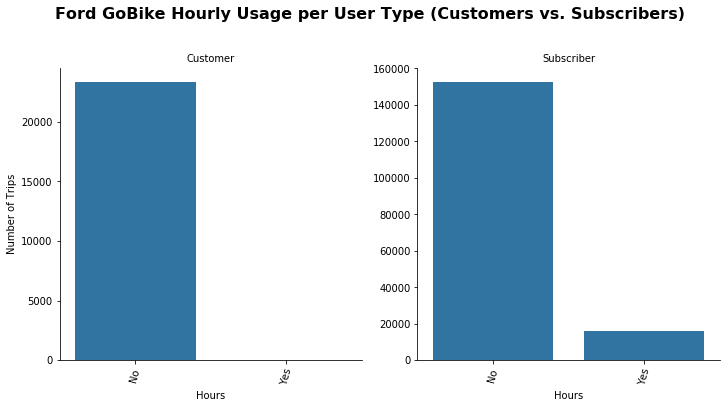

In [54]:
fig = sb.catplot(data=ford_clean, x='bike_share_for_all_trip', col = 'user_type', kind='count', color=base_color, sharey=False);
fig.set_axis_labels("Hours", "Number of Trips");
fig.set_titles('{col_name}');
fig.fig.suptitle('Ford GoBike Hourly Usage per User Type (Customers vs. Subscribers)', y=1.1, fontsize=16, fontweight='bold');
fig.set_xticklabels(rotation = 75);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The analysis revealed different behavior in usage after adding user type. There is strong suggestion that customers are casual riders and tourists, we saw that when the usage of this type increased over the weekends. In contrast, subscribers are those who use bikes for daily school/work commute, where their usage constantly high over weekdays and reach its peak in 8am and 5pm.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The difference in trips' duration goes for customers as they have longer durations. Mainly, because they would like to explore sorrounding areas. In contrast, subscribers who are commuters would want to reach their destination quicker. 

<a id='multivar'></a>
## Multivariate Exploration

 In this section, I will create plots of three or more variables to investigate the dataset even
further.

In [42]:
ford_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
bike_share_for_all_trip          category
start_day                        category
start_hour                       category
duration_min                        int64
distance_miles                    float64
dtype: object

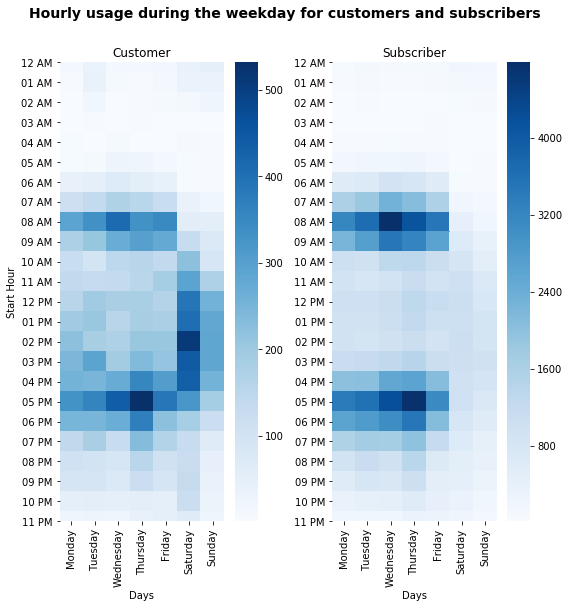

In [58]:
# Hourly usage during days of the week

plt.figure(figsize=(8,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', y = 1.05, fontsize=14, fontweight='semibold')

# Customers heatmap
plt.subplot(1, 2, 1)
customer_df = ford_clean.query('user_type == "Customer"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
customer_df = customer_df.pivot("start_hour", "start_day", "bike_id")
sb.heatmap(customer_df, cmap="Blues")

plt.title("Customer", y=1.1)
plt.xlabel('Days')
plt.ylabel('Start Hour')

# Subscribers heatmap
plt.subplot(1, 2, 2)
sub_df = ford_clean.query('user_type == "Subscriber"').groupby(["start_hour", "start_day"])["bike_id"].size().reset_index()
sub_df = sub_df.pivot("start_hour", "start_day", "bike_id")
sb.heatmap(sub_df, cmap="Blues")

plt.title("Subscriber", y=1.1)
plt.xlabel('Days')
plt.ylabel('');
plt.tight_layout()

###### Observation #1: The above plot summarizes all the analysis we have done before between days of the week, rent start hour and user type, that subscribers rent bikes mostly on weekdays at 8am and 5pm, while customers rent bikes at weekends 12pm - 6pm.

In [44]:
subscriber_member_df = ford_clean[ford_clean['user_type'] == 'Subscriber'].groupby(['start_day','bike_share_for_all_trip']).agg({'bike_id':'count'}).reset_index()

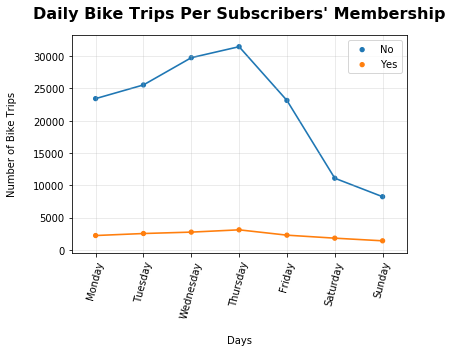

In [45]:
# Comparing daily number of bike trips per subscribers, based on their membership
labels = ['Not a member','Member']
sb.pointplot(data = subscriber_member_df, x='start_day', y='bike_id', hue='bike_share_for_all_trip', scale=.6, order = days, height=5, aspect=2);

plt.xlabel('Days', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Daily Bike Trips Per Subscribers' Membership", y = 1.05, fontsize = 16, fontweight = 'bold');
plt.legend();
plt.grid(alpha=0.3)
plt.xticks(rotation = 75);

###### Observation #2: We can clearly see that members of the bike share for all membership trip's usage is constant over days bwtween (0-5000) trip. While non members trips' usages are sharply high on weekdays and decreases sharply on weekends, which indicates they are school/work commuters.

In [46]:
subscriber_hour_df = ford_clean[ford_clean['user_type'] == 'Subscriber'].groupby(['start_hour','bike_share_for_all_trip']).agg({'bike_id':'count'}).reset_index()

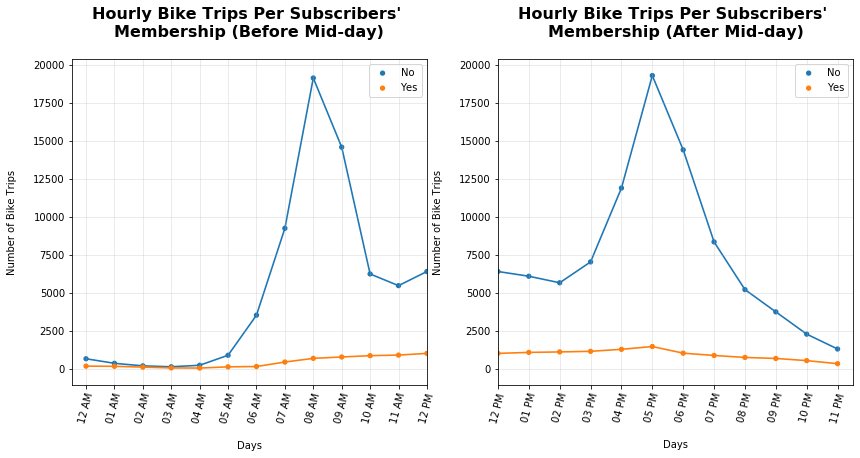

In [47]:
# Comparing hourly number of bike trips per subscribers, based on their membership
plt.figure(figsize=[14,6])

plt.subplot(1,2,1)
sb.pointplot(data = subscriber_hour_df, x='start_hour', y='bike_id', hue='bike_share_for_all_trip', scale=.6, height=5, aspect=2);
plt.xlim(right=12)
plt.xlabel('Days', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.legend();
plt.grid(alpha=0.3)
plt.xticks(rotation = 75);
plt.title("Hourly Bike Trips Per Subscribers' \nMembership (Before Mid-day)", y = 1.05, fontsize = 16, fontweight = 'bold');

plt.subplot(1,2,2)
sb.pointplot(data = subscriber_hour_df, x='start_hour', y='bike_id', hue='bike_share_for_all_trip', scale=.6, height=5, aspect=2);
plt.xlim(left=12)
plt.xlabel('Days', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.legend();
plt.grid(alpha=0.3)
plt.xticks(rotation = 75);
plt.title("Hourly Bike Trips Per Subscribers' \nMembership (After Mid-day)", y = 1.05, fontsize = 16, fontweight = 'bold');

###### Observation #3: Here, we can see that members' usage over the hours slightly increase around 7 am and decrease 5pm. For non members, as we have discussed that they are the school/work commuters, we can see that their mainly usage is between 6-9am and 4-6pm.

In [48]:
subscriber_dur_df = ford_clean[ford_clean['user_type'] == 'Subscriber'].groupby(['duration_min','bike_share_for_all_trip']).agg({'bike_id':'count'}).reset_index()

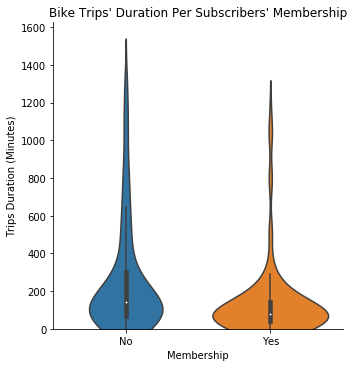

In [49]:
sb.catplot(data=subscriber_dur_df, x='bike_share_for_all_trip', y="duration_min", kind="violin")
plt.ylim(bottom=0);
plt.xlabel('Membership');
plt.ylabel('Trips Duration (Minutes)');
plt.title("Bike Trips' Duration Per Subscribers' Membership");

###### Observation #4: Members trips' durations are shorter than non members, which suggests that their trips' distances might be short.

In [50]:
subscriber_dist_df = ford_clean[ford_clean['user_type'] == 'Subscriber'].groupby(['distance_miles','bike_share_for_all_trip']).agg({'bike_id':'count'}).reset_index()

In [51]:
subscriber_dist_df.distance_miles.describe()

count    16578.000000
mean         1.414862
std          0.910428
min          0.000000
25%          0.751593
50%          1.256050
75%          1.915780
max         38.064762
Name: distance_miles, dtype: float64

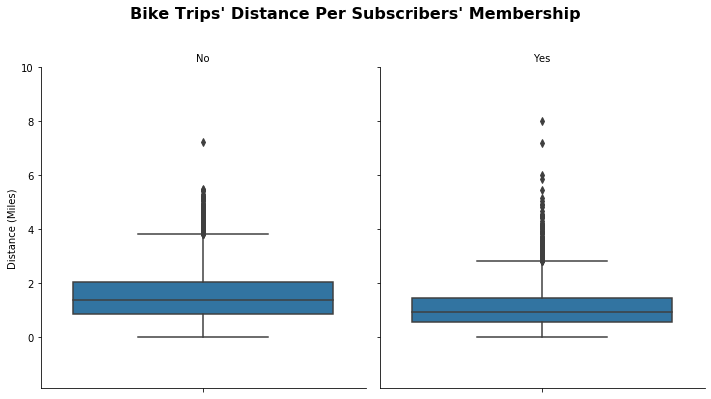

In [52]:
fig = sb.catplot(data=subscriber_dist_df, y='distance_miles', col="bike_share_for_all_trip", kind='box', color = base_color);
fig.set_titles(col_template = '{col_name}')
fig.set_axis_labels("", "Distance (Miles)")
fig.fig.suptitle("Bike Trips' Distance Per Subscribers' Membership", y=1.1, fontsize=16, fontweight='bold');
plt.ylim(top=10);

###### Observation #5: As we expected, the distance of those with a membership is shorter than non-members.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This section has summarized all of the previous analysis, and provided more insights on the data. The subscriber vs customer' membership have been expanded to include days, hours, durations and distances. Where the non members' usages increase during the weekdays and around 8am and 5pm with a longer duration and distance than the members of bike share for all membership.
### Were there any interesting or surprising interactions between features?

Nothing out of the expected. It was interesting to observe the sharp daily difference for members vs. non-members, which suggests taking into consideration the causes of low members.

<a id='conclusion'></a>
## Conclusion

In this project, we have gone through all the aspects of the visualization process. The results of this project could help Ford GoBike company in increasing their sales and improving their services to gain more customer satisfactions. A few features could be provided to improve the analysis and maximize the benefit of this project, such as age and gender to target a specific audience.

<a id='ref'></a>
## References
1. “Bay Wheels,” Wikipedia, 12-Nov-2019. [Online]. Available: https://en.wikipedia.org/wiki/Bay_Wheels. [Accessed: 05-Jan-2020].
2. Lyft, Inc, “System Data: Bay Wheels,” Lyft. [Online]. Available: https://www.lyft.com/bikes/bay-wheels/system-data. [Accessed: 05-Jan-2020].
3. “8.1. datetime - Basic date and time types¶,” 8.1. datetime - Basic date and time types - Python 3.4.10 documentation. [Online]. Available: https://docs.python.org/3.4/library/datetime.html?highlight=weekday. [Accessed: 05-Jan-2020].
4. 262588213843476, “Calculate distance between latitude longitude pairs with Python,” Gist. [Online]. Available: https://gist.github.com/rochacbruno/2883505. [Accessed: 06-Jan-2020].